In [4]:
import sympy 
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## [Polynomial interpolation](https://en.wikipedia.org/wiki/Polynomial_interpolation)



### [Lagrange polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial)


Let´s say we have a set of 'train' points ($X_i,Y_i$). Our goal is to generate a polynomial which approximates a function over a set of points
* Firstly, we form L(x) using train data:  $L(x):= \sum\limits_{j=0}^k y_jl_j(x)$ <br>
* For each $j$: $l_j(x):= \prod\limits_{m=0,m!=j}^k \frac{x-x_m}{x_j-x_m} $
* Secondly, we calculate predictions using L(x), for any x from a test set


In [2]:
#correct implementation: fit using train, generate an equation, then use it to evaluate test
def LagrangePolynomial_interpolate(X,Y):
    x,n = sympy.Symbol('x'),len(X)
    function = 0
    for i in range(n):
        def L(i):
            Lv = 1
            for j in range(n):
                if i!=j:
                    Lv*=(x - X[j])/(X[i]-X[j])
            return Lv
        function+=Y[i]*L(i)
    return function
def LagrangePolynomial_predict(x,function):
    return function.subs({'x':x})

In [3]:
x=np.array([0.38,0.49,0.99,1.09,1.19,1.40,1.71,1.72,2.04,2.38,2.53], dtype=float)
y=np.array([1.462,1.632,2.691,2.974,3.287,4.055,5.528,5.584,7.690,10.804,12.553], dtype=float)

function = LagrangePolynomial_interpolate(x,y)

xnew=np.linspace(np.min(x),np.max(x),20)
ynew = [LagrangePolynomial_predict(x,function) for x in xnew]

In [4]:
x,f = np.array([-1, 0, 1]),np.array([-3,1,2])
function = LagrangePolynomial_interpolate(x,f)

xnew = np.linspace(np.min(x),np.max(x),20)
ynew = [LagrangePolynomial_predict(x,function) for x in xnew]

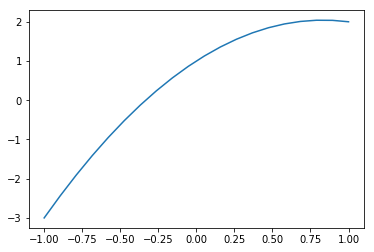

In [5]:
plt.plot(xnew,ynew)

In [6]:
#0 to 2
#f(0.6283) = 0.5878

x,f = np.array([i/4 for i in range(0,9,1)]),np.array([0,0.2474,0.4794,0.6816,0.8415,0.949,0.9975,0.984,0.9093])
function = LagrangePolynomial_interpolate(x,f)

xnew = np.linspace(np.min(x),np.max(x),24)
ynew = [LagrangePolynomial_predict(x,function) for x in xnew]



In [7]:
function.subs({'x':0.6283})

0.587718906206092

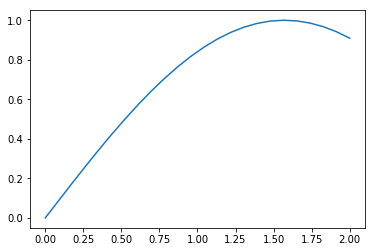

In [8]:
plt.plot(xnew,ynew)

## [Chebyshev polynomial interpolation](https://people.sc.fsu.edu/~jburkardt/f_src/chebyshev/chebyshev.html)

To form an interplation polynomial on a segment [-1;1], we do the following:
* Firstly, we form Chebyshev polynomials $T$ via recursive formula:
    * $ T_0:=1, T_1:=x$ 
    * $T_{k+1} = 2x * T_k -T_{k-1} $
* Secondly, we calculate coefficients $A$ using formulas:
    * $A_0 := \frac{1}{n+1} * \sum\limits_{k=0}^n f(x_k)  $ 
    * $A_j := \frac{2}{n+1} * \sum\limits_{k=0}^n f(x_k)*T_j(x_k) $
* Finally, we form an interpolation polynomial:
    * $L(x) := \sum\limits_{k=0}^nA_k * T_k $

In [9]:
from math import *
class ChebyshevB:
    """
    Given a function, limits of the interval [a,b] and maximum degree n, class computes Chebyshev approximation of the function.
    """
    def __init__(self,a,b,n,func):
        self.a=a
        self.b=b
        
        bma,bpa = 0.5 * (b-a), 0.5 * (b+a)
        f = [func(cos(pi * (k+0.5) / n ) * bma + bpa) for k in range(n)]
        fac = 2.0/n
        self.c = [fac * sum([f[k] * cos(pi * j * (k+0.5)/n) for k in range(n)]) for j in range(n)]
        
    def eval(self,x):
        assert (self.a<=x<=self.b)
        y = (2.0 * x - self.a - self.b) * (1.0 / (self.b-self.a))
        y2,d,dd = 2.0*y,self.c[-1],0
        for cj in self.c[-2:0:-1]:
            (d,dd) = (y2*d-dd+cj,d)
        return y * d - dd + 0.5 * self.c[0]        

In [10]:
ch = ChebyshevB(-1,1,6,sin)
print(ch.eval(0.1))
assert(round(sin(0.1),5) == round(ch.eval(0.1),5))

0.09983291587368016


In [7]:
from math import pi

In [8]:
class Chebyshev:
    """
    self.f -- function (i.e., sin)
    self.L -- resulting Chebyshev interpolation polynomial
    self.T -- Chebyshev polynomials
    """    
    def generate_x(self,k,n):
        return math.cos((pi*(2*k+1))/(2*(n+1)))
    def generate_y(self):
        return [self.f(k) for k in self.X]

    def __init__(self,k,n,f):
        """
        Arguments:
        ---------
        f -- input func (i.e, sin)
        k -- number of points
        n -- number of polys
        """    
        self.x,self.f = sympy.Symbol('x'),f    
        self.X,self.n = [self.generate_x(i,n) for i in range(k)],n
        
        self.Y = self.generate_y()
        self.T = self.generateT()
        self.A = self.generateA()
        
        self.L = sum(a*t for a,t in zip(self.A,self.T))
        
    def generateT(self):
        T_i = lambda i: 2*self.x*T[i-1]-T[i-2]
        T = [1,self.x]
        for k in range(2,self.n+1):
            T.append(T_i(k))
        return T
    
    def generateA(self):
        A = [(sum(self.Y)/(self.n+1))] #a_0
        A.extend([(2/(self.n+1))*sum(y*self.T[i].subs({'x':x}) for x,y in zip(self.X,self.Y)) for i in range(1,self.n+1)])
        return A
    
    def getX(self):
        return self.X
    def getY(self):
        return self.Y
    
    def getA(self):
        return self.A
    def getT(self):
        return self.T
    
    def getL(self):
        return self.L
    
    def eval(self,x):
        self.L
        return self.L.subs({'x':x})

In [14]:
ch = Chebyshev(9,8, math.sin)
ch.eval(0.7777)

0.701642448985430